___
# Atividade: Teoria da Probabilidade - <font color='blue'>Eduardo Tirta e Vitória Camilo</font>
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice

import random as rd


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

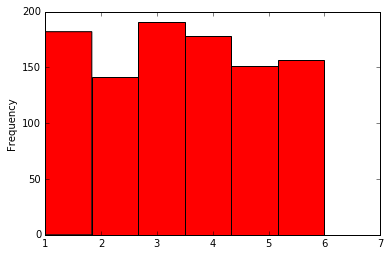

In [3]:
x = pd.Series(randint(1,7, size=1000))

x.plot.hist(stacked=True, bins=6, legend=False, color='r')

A probabilidade não é exatamente igual, já que a quantidade de jogadas não é suficiente grande para termos a exata proporção

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

a) A probabilidade teórica é de 6/36, as 6 combinações que somam 7, dentre as 36 combinações possíveis, resultando 1/6.

b) A probabilidade teórica é de 1/6, do único número que soma 7, dentre os 6 possíveis.

É igual porque o lançar dos dois dados em ambos os casos são eventos independentes um do outro.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [4]:
portas = ["premio","nada", "nada"]
ganhar = 0
perder = 0

#são três portas e em uma delas existe o "premio"
for i in range(0, 100000):
    sorte = rd.randrange(0,3)
    escolha = portas[sorte]
    
    #caso escolha na sorte uma das porta
    if sorte == 0:
        perder = perder + 1
    
    #se a primeira escolha tiver o premio é a unica probabilidade de perder caso troque
    elif sorte == 1:
        ganhar = ganhar + 1
    
    elif sorte == 2:
        ganhar = ganhar + 1

porcent1 = (ganhar/100000) * 100
porcent2 = (perder/100000) * 100
print("Você ganhou", str(porcent1), "% das vezes que trocou de porta, e", str(porcent2), "% das vezes que não trocou de porta!")

Você ganhou 66.86999999999999 % das vezes que trocou de porta, e 33.129999999999995 % das vezes que não trocou de porta!
